In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

In [2]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [3]:
import numpy as np
import pandas as pd
import time

## Scaling X values to [0,1], converting y to integer, spliting dataset

In [4]:
X = X / 255.0

In [5]:
y = y.astype(int)
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Using lib models

In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
start = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_time = time.time() - start
print(f'Accuracy LogReg:',model.score(X_test, y_test)) 
print(f'Train time:', train_time)

Accuracy LogReg: 0.9204285714285714
Train time: 32.28300476074219


In [8]:
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

correct_indices = np.where(y_pred_np == y_test_np)[0]
incorrect_indices = np.where(y_pred_np != y_test_np)[0]

In [9]:
import matplotlib.pyplot as plt

def plot_images(images, true_labels, pred_labels, indices, title):
    plt.figure(figsize=(12, 6))
    n_images = min(len(indices), 9)
    for i, idx in enumerate(indices[:n_images]):
        plt.subplot(3, 3, i + 1)
        img = images.iloc[idx].values.reshape(28, 28)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_labels[idx]}\nPred: {pred_labels[idx]}", fontsize=10)
        plt.axis('off')
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

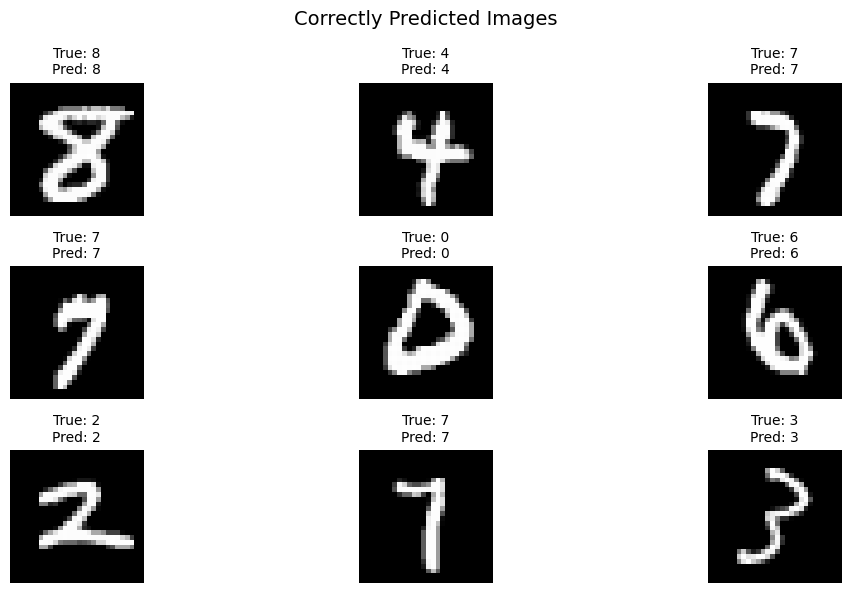

In [10]:
plot_images(
    X_test, y_test_np, y_pred_np, correct_indices, 
    title="Correctly Predicted Images"
)

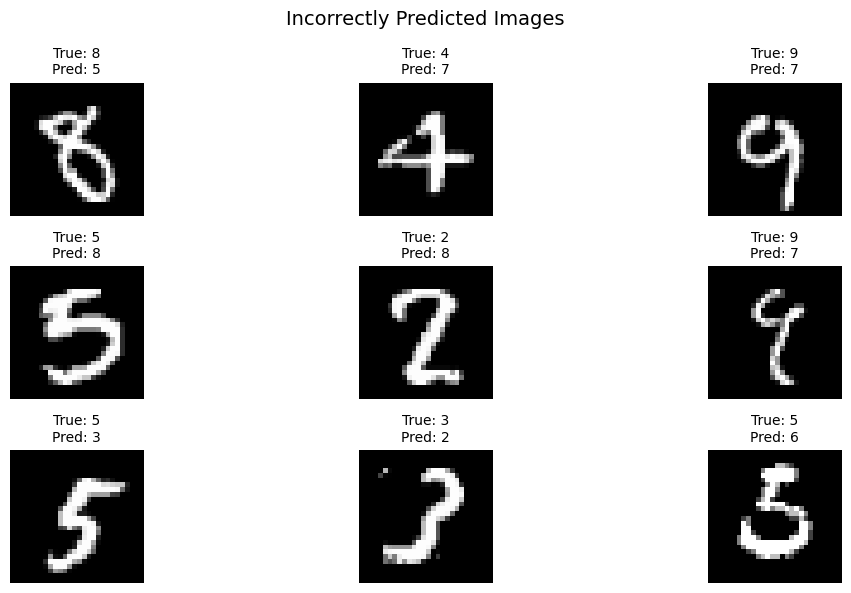

In [11]:
plot_images(
    X_test, y_test_np, y_pred_np, incorrect_indices, 
    title="Incorrectly Predicted Images"
)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.94      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



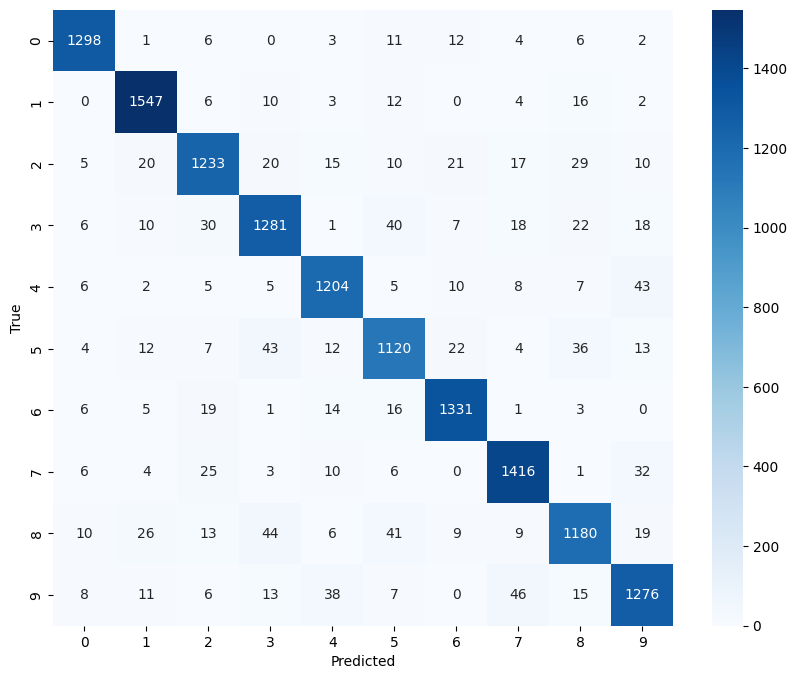

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
start = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_time = time.time() - start
print(f'Accuracy LogReg:',model.score(X_test, y_test)) 
print(f'Train time:', train_time)

Accuracy LogReg: 0.9667142857142857
Train time: 24.232107162475586


In [14]:
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

correct_indices = np.where(y_pred_np == y_test_np)[0]
incorrect_indices = np.where(y_pred_np != y_test_np)[0]

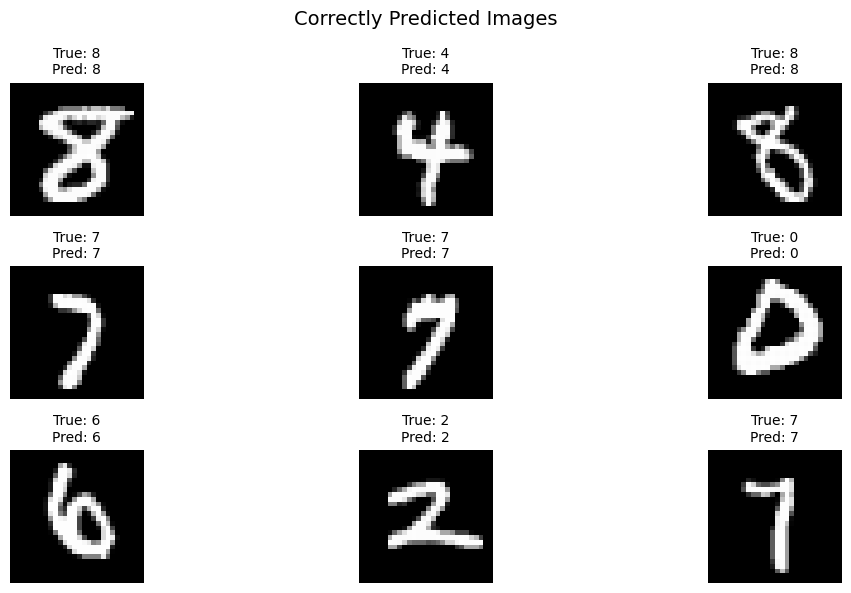

In [15]:
plot_images(
    X_test, y_test_np, y_pred_np, correct_indices, 
    title="Correctly Predicted Images"
)

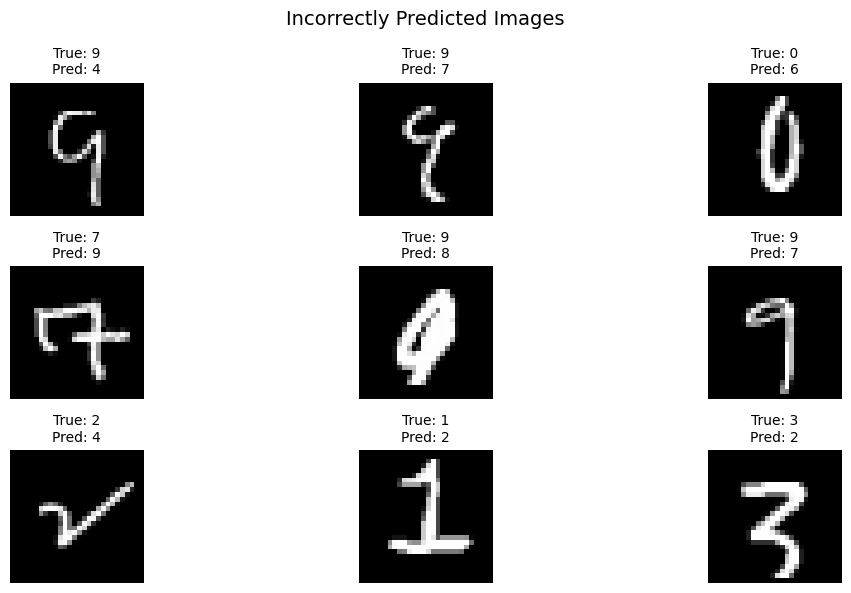

In [16]:
plot_images(
    X_test, y_test_np, y_pred_np, incorrect_indices, 
    title="Incorrectly Predicted Images"
)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.95      0.95      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.96      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



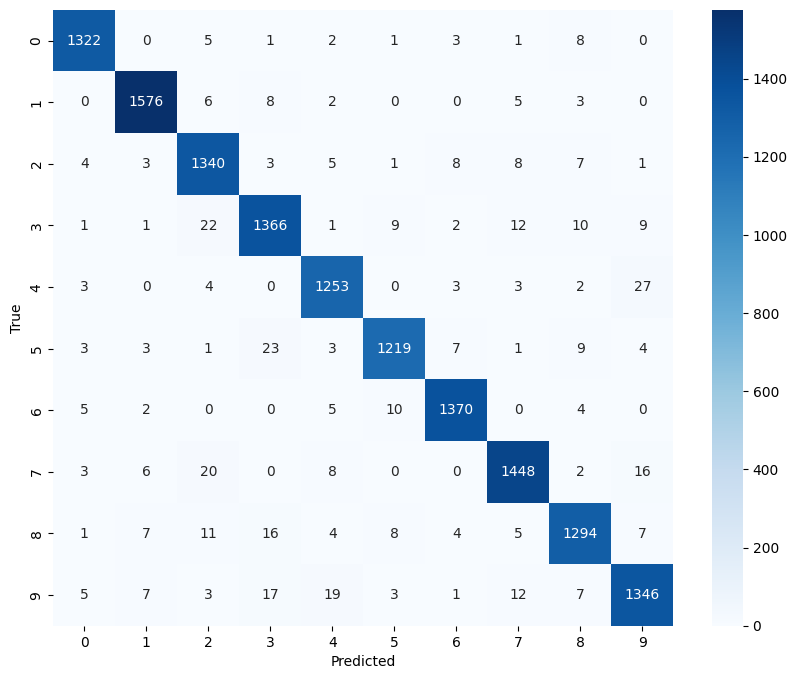

In [17]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

model = QuadraticDiscriminantAnalysis()
start = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_time = time.time() - start
print(f'Accuracy LogReg:',model.score(X_test, y_test)) 
print(f'Train time:', train_time)

/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 3 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/opt

Accuracy LogReg: 0.5471428571428572
Train time: 9.878805875778198


In [19]:
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

correct_indices = np.where(y_pred_np == y_test_np)[0]
incorrect_indices = np.where(y_pred_np != y_test_np)[0]

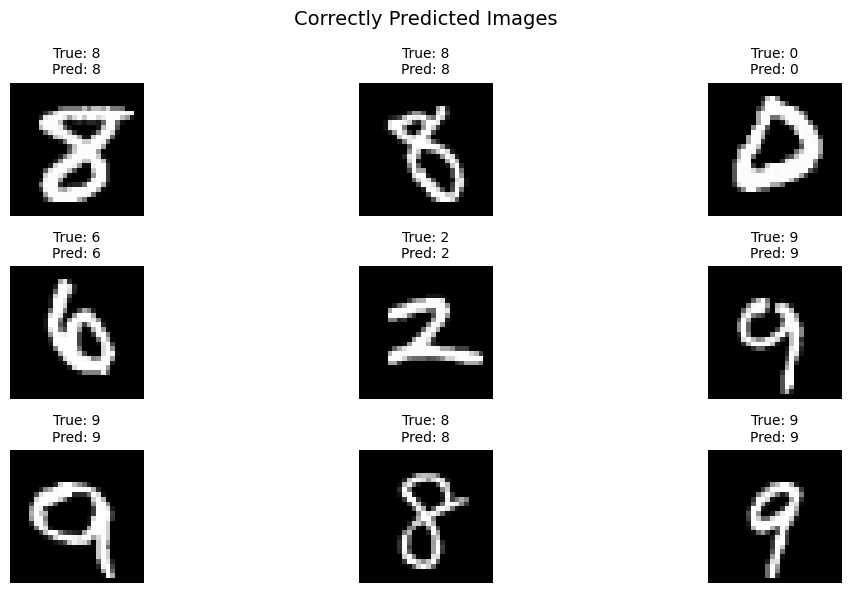

In [20]:
plot_images(
    X_test, y_test_np, y_pred_np, correct_indices, 
    title="Correctly Predicted Images"
)

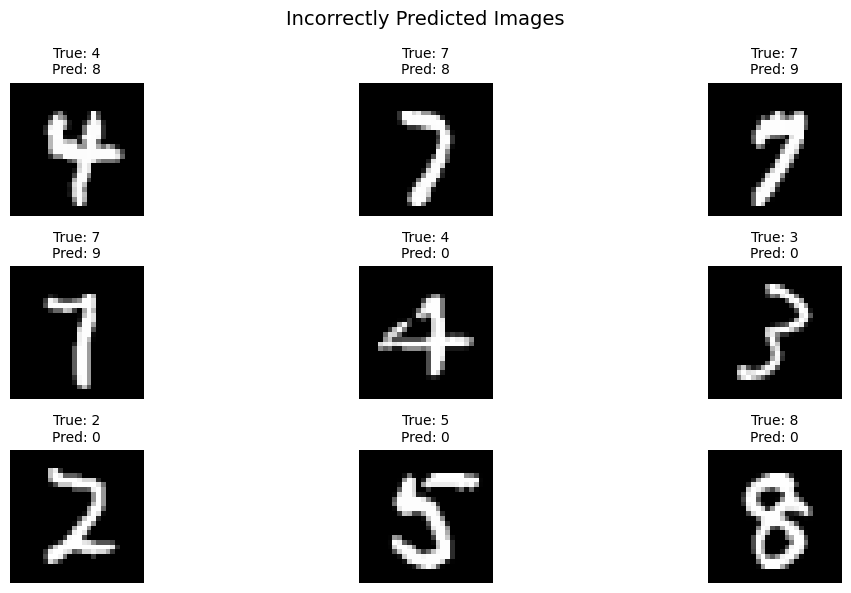

In [21]:
plot_images(
    X_test, y_test_np, y_pred_np, incorrect_indices, 
    title="Incorrectly Predicted Images"
)

              precision    recall  f1-score   support

           0       0.28      0.97      0.43      1343
           1       0.88      0.95      0.92      1600
           2       0.85      0.24      0.38      1380
           3       0.69      0.32      0.44      1433
           4       0.90      0.13      0.22      1295
           5       0.93      0.17      0.29      1273
           6       0.71      0.94      0.81      1396
           7       0.94      0.37      0.53      1503
           8       0.52      0.33      0.40      1357
           9       0.48      0.94      0.64      1420

    accuracy                           0.55     14000
   macro avg       0.72      0.54      0.51     14000
weighted avg       0.72      0.55      0.52     14000



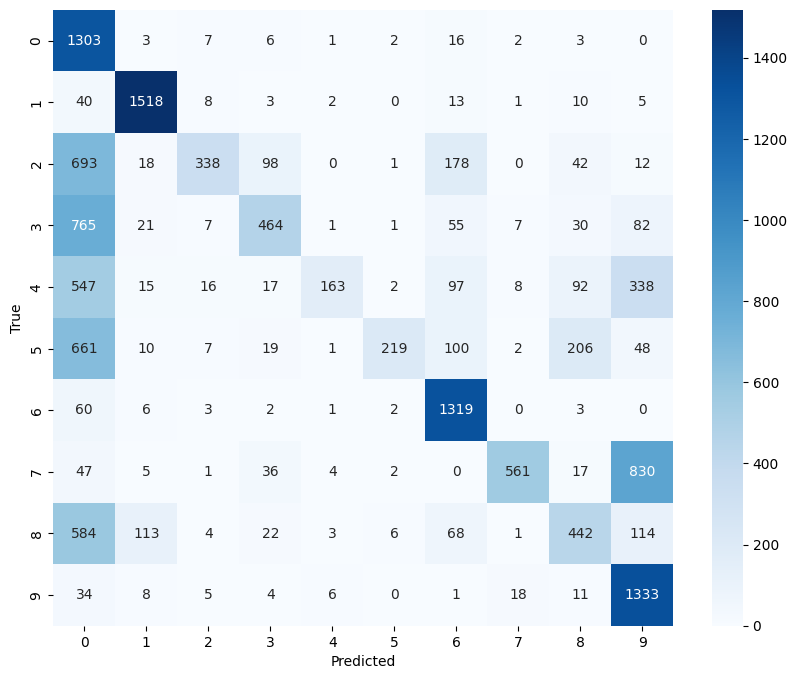

In [22]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [23]:
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=1000, random_state=42)
start = time.time()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_time = time.time() - start
print(f'Accuracy LogReg:',model.score(X_test, y_test)) 
print(f'Train time:', train_time)

Accuracy LogReg: 0.9145714285714286
Train time: 30.05406880378723


In [24]:
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

correct_indices = np.where(y_pred_np == y_test_np)[0]
incorrect_indices = np.where(y_pred_np != y_test_np)[0]

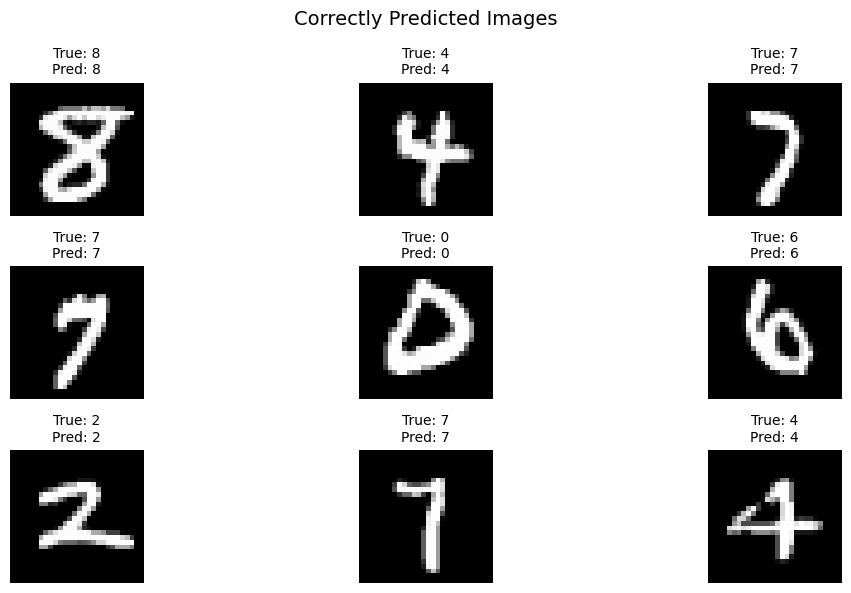

In [25]:
plot_images(
    X_test, y_test_np, y_pred_np, correct_indices, 
    title="Correctly Predicted Images"
)

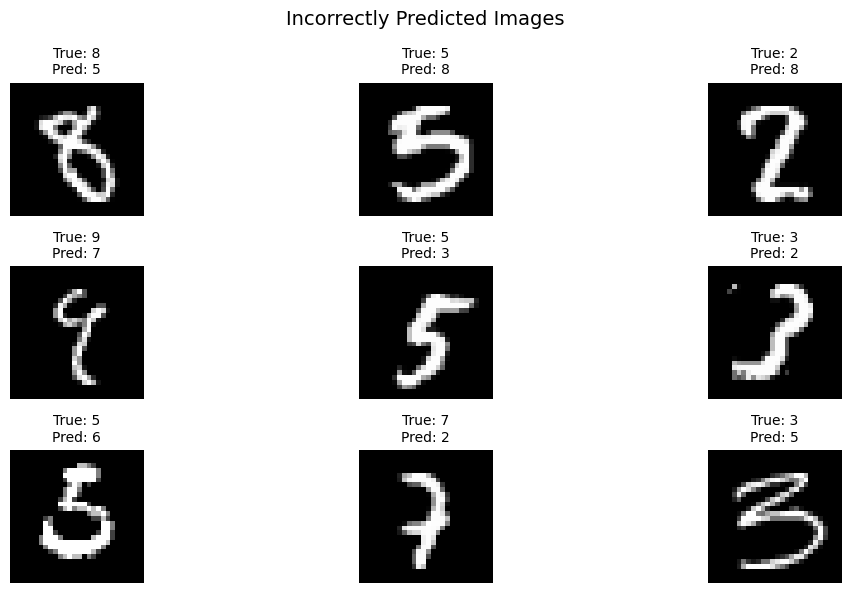

In [26]:
plot_images(
    X_test, y_test_np, y_pred_np, incorrect_indices, 
    title="Incorrectly Predicted Images"
)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.94      0.98      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.89      0.89      0.89      1433
           4       0.92      0.93      0.92      1295
           5       0.87      0.87      0.87      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.94      1503
           8       0.89      0.83      0.86      1357
           9       0.89      0.88      0.89      1420

    accuracy                           0.91     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.91      0.91     14000



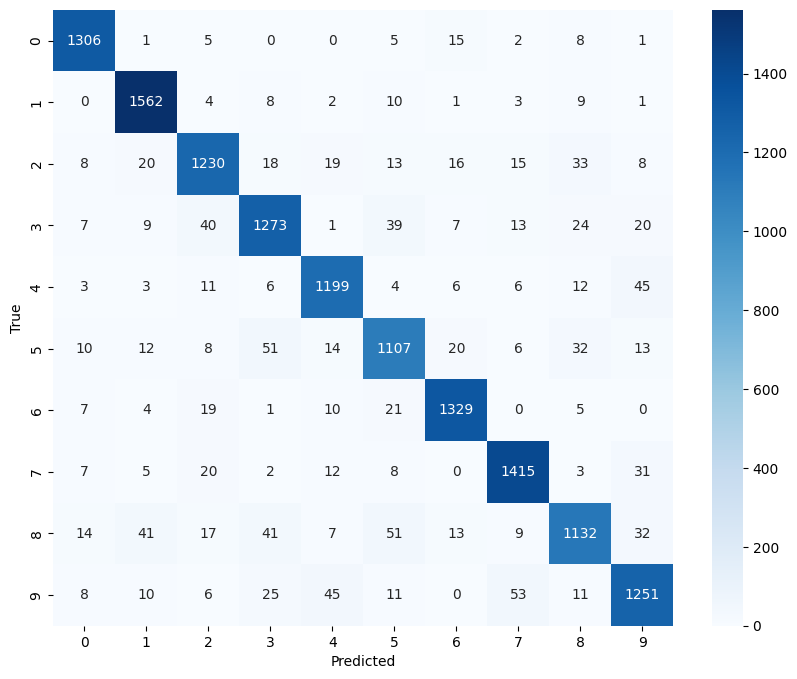

In [27]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# XGBOOST+PCA 

In [28]:
!pip install xgboost

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Original shape: {X_train.shape}")
print(f"Reduced shape: {X_train_pca.shape}")

Original shape: (56000, 784)
Reduced shape: (56000, 154)


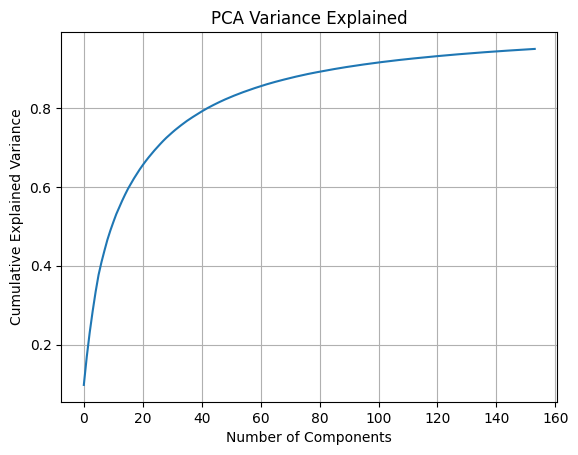

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.grid()
plt.show()

In [31]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train_pca, label=y_train)
dtest = xgb.DMatrix(X_test_pca, label=y_test)

params = {
    'objective': 'multi:softmax',
    'num_class': 10,
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

start = time.time()
model = xgb.train(params, dtrain, num_boost_round=100)
y_pred = model.predict(dtest)
end = time.time()
print(f'Train time', end-start)

Train time 12.07077670097351


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.96      0.95      0.95      1433
           4       0.96      0.96      0.96      1295
           5       0.95      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.96      0.96      0.96      1503
           8       0.96      0.94      0.95      1357
           9       0.95      0.95      0.95      1420

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000



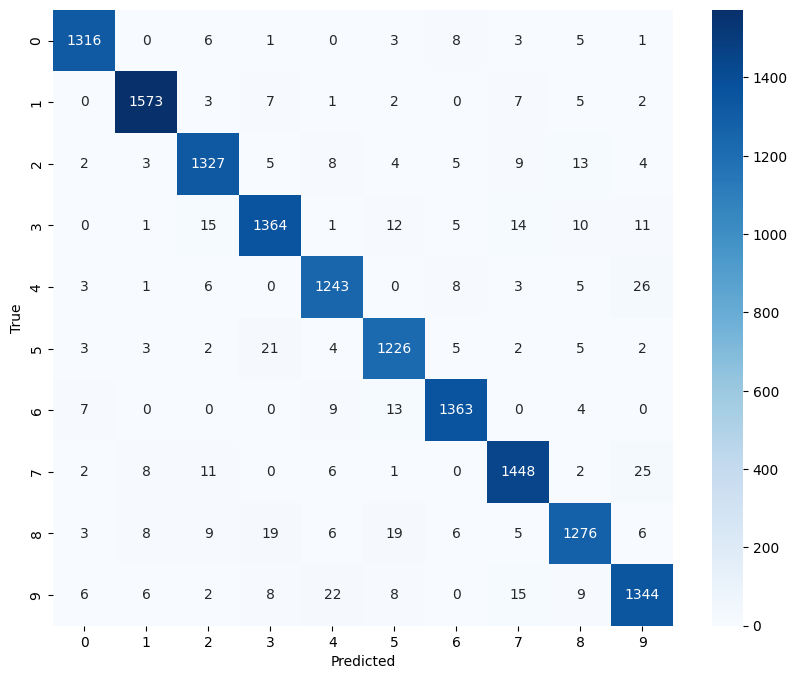

In [32]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [33]:
y_test_np = np.array(y_test)
y_pred_np = np.array(y_pred)

correct_indices = np.where(y_pred_np == y_test_np)[0]
incorrect_indices = np.where(y_pred_np != y_test_np)[0]

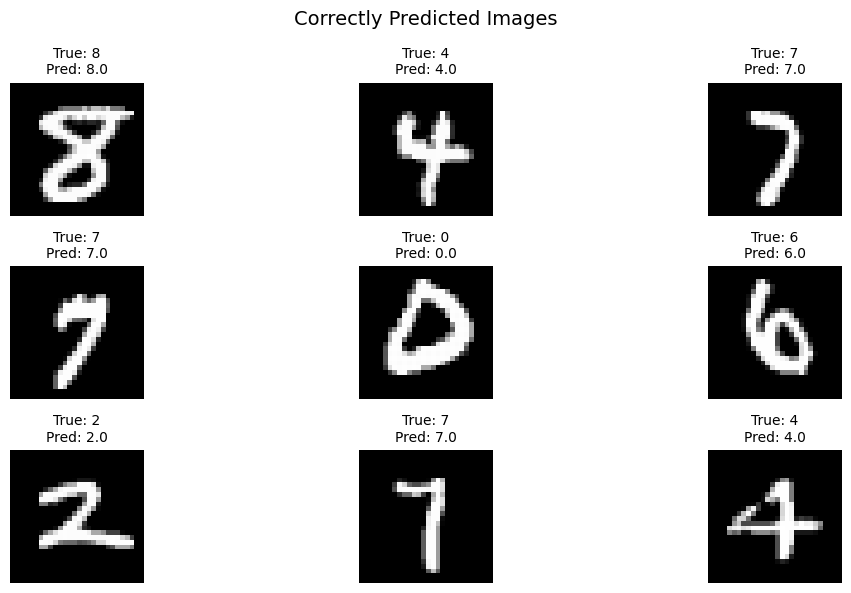

In [34]:
plot_images(
    X_test, y_test_np, y_pred_np, correct_indices, 
    title="Correctly Predicted Images"
)

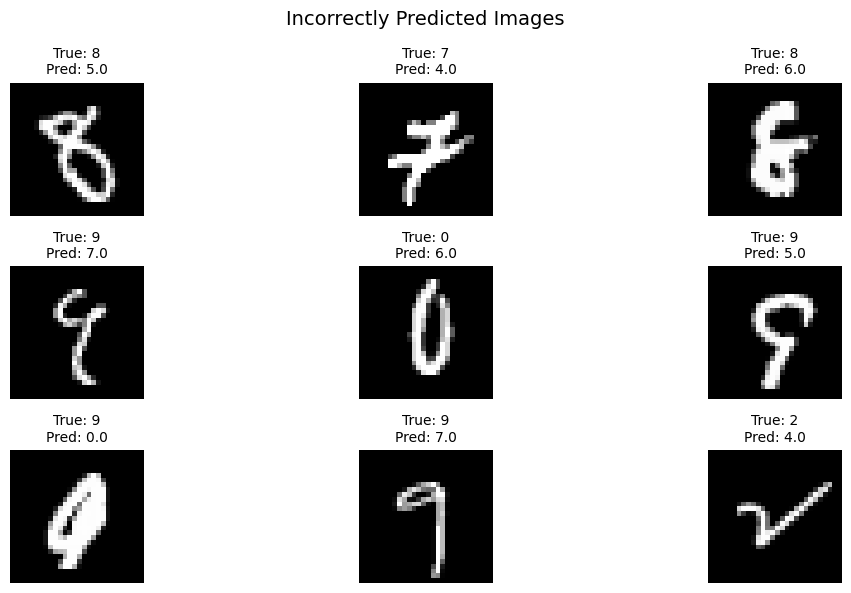

In [35]:
plot_images(
    X_test, y_test_np, y_pred_np, incorrect_indices, 
    title="Incorrectly Predicted Images"
)

# Comparing Performance

In [36]:
models = {
    "Logistic Regression": {"Accuracy": 0.92, "Precision": 0.92, "Recall": 0.92, "F1": 0.92, "Runtime (s)": 34},
    "Random Forest": {"Accuracy": 0.97, "Precision": 0.97, "Recall": 0.97, "F1": 0.97, "Runtime (s)": 26},
    "QDA": {"Accuracy": 0.55, "Precision": 0.72, "Recall": 0.54, "F1": 0.51, "Runtime (s)": 10},
    "SVM": {"Accuracy": 0.91, "Precision": 0.91, "Recall": 0.91, "F1": 0.91, "Runtime (s)": 31},
    "PCA + XGBoost": {"Accuracy": 0.96, "Precision": 0.96, "Recall": 0.96, "F1": 0.96, "Runtime (s)": 11},
}
results_df = pd.DataFrame(models).T
results_df

,Accuracy,Precision,Recall,F1,Runtime (s)
Logistic Regression,0.92,0.92,0.92,0.92,34.0
Random Forest,0.97,0.97,0.97,0.97,26.0
QDA,0.55,0.72,0.54,0.51,10.0
SVM,0.91,0.91,0.91,0.91,31.0
PCA + XGBoost,0.96,0.96,0.96,0.96,11.0


**Key Takeaways:**
1. **Best Accuracy**: Random Forest achieves the highest accuracy (97%) but is slow to train.
2. **Speed vs. Performance Trade-off**:  PCA + XGBoost reduces dramatically training time with minimal accuracy drop.
3. **Lightweight Option**: QDA is the fastest but least accurate.

# Write up

**MNIST**

The MNIST-784 dataset is a classic benchmark in machine learning, consisting of 70,000 grayscale images (28×28 pixels) of handwritten digits (0–9). Each image is flattened into a 784-dimensional vector (hence "784"), with pixel values ranging from 0 (white) to 255 (black). 
The goal is to classify each image into one of 10 digit classes (0–9)

**Preproccesing**

Average image has aroud 70 unique values of pixel, usally this values are close to 0(background) and 255(ink), since our pixels can take such different values (too big and too small), its reasonable to normalize our data to [0, 1] range, for that i just divided my X's by 255

**Images and graphs**

Graphs, images confusion matrixes all are shown for each algorithm right after it's been used

**Some possible improvements**
General: we could increase qunatity of our data by generating data using rotations, shifts, changing intensities of pixels etc.

1. **LogReg**: We can use kernel trick to add nonlinearity or add regularization
2. **SVM**: We can use different kernels e.g rbf (accuracy ~ 98%)
3. **RF**: Hyperparameter tuning
4. **QDA**: It's so low i dont know why
5. **XGB**: Hyperparameter tuning


# Logistic Regression Implementation

In [11]:
from sklearn.preprocessing import OneHotEncoder

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.lr = learning_rate
        self.max_iter = max_iter
        self.weights = None
        
    def _softmax(z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def _one_hot_encode(self, y):
        encoder = OneHotEncoder(sparse=False)
        return encoder.fit_transform(y.reshape(-1, 1))
    
    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        
        y_onehot = self._one_hot_encode(y)  

        prev_loss = float('inf')
        
        prev_loss = loss
        
        for _ in range(self.max_iter):
            scores = X @ self.weights
            probs = self._softmax(scores)

            loss = -np.mean(y_onehot * np.log(probs + 1e-15))
            
            if np.abs(prev_loss - loss) < self.tol:
                break
            
            error = -(y_onehot - probs)
            grad = X.T.dot(error) / X.shape[0]
            
            self.weights -= self.learning_rate * grad


    def predict_proba(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        scores = X.dot(self.weights)
        return self._softmax(scores)
    
    def predict(self, X):
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

# QDA Implementation

In [8]:
class DiscriminantAnalysis:
    
    def __init__(self, model):
        assert model in ['Linear', 'Quadratic']
        self.model = model
        self.labels = None
        self.means = {}
        self.covariance_matrices = {}
        self.covariance_matrix_inverse = None
        self.label_log_probabilities = {}
    
    @staticmethod
    def get_stats(x):
        mean = np.mean(x, axis=0)
        covariance_matrix = np.cov(x.T, ddof=x.shape[1])
        return mean, covariance_matrix
    
    @staticmethod
    def get_label_log_probabilities(y):
        unique_labels, counts = np.unique(y, return_counts=True)
        total = len(y)
        log_probabilities = {label: np.log(count/total) for label, count in zip(unique_labels, counts)}
        return log_probabilities
    
    def ldf(self, x, mean, covariance_matrix_inverse):
        if self.model == 'Linear':
            cov_mean = covariance_matrix_inverse @ mean
            a = x @ cov_mean - mean.T @ cov_mean / 2
            print(a.shape)
            return x @ cov_mean - mean.T @ cov_mean / 2
        else:
            cov_mean = covariance_matrix_inverse @ mean
            a = x @ cov_mean - mean.T @ cov_mean / 2
            print(a.shape)
            return -np.log(np.linalg.det(covariance_matrix_inverse))/2 + a - np.diag(x @ covariance_matrix_inverse @ x.T) /2
    
    def fit(self, x_train, y_train):
        x_train = x_train
        y_train = y_train.values
        self.labels = np.unique(y_train)
        label_log_probabilities = self.get_label_log_probabilities(y_train)
        self.label_log_probabilities = label_log_probabilities
        for label in self.labels:
            x_labeled = x_train[y_train == label]
            mean, covariance_matrix = self.get_stats(x_labeled)
            self.covariance_matrices[label] = covariance_matrix
            self.means[label] = mean
        if self.model == 'Linear':
            self.covariance_matrix_inverse = np.linalg.inv(np.mean(list(self.covariance_matrices.values()), axis=0))
    
    def predict(self, x_test):
        return self.labels[np.argmax(self.predict_probabilities(x_test), axis=0)]
    
    def predict_probabilities(self, x_test):
        x_test = x_test
        probabilities = []
        for label in self.labels:
            mean = self.means[label]
            if self.model == 'Linear':
                covariance_matrix_inverse = self.covariance_matrix_inverse
            else:
                covariance_matrix_inverse = np.linalg.inv(self.covariance_matrices[label])
            prob = self.ldf(x_test, mean, covariance_matrix_inverse) + self.label_log_probabilities[label]
            probabilities.append(prob)
        return np.array(probabilities)
    
    def score(self, x_test, y_test):
        x_test = x_test
        y_train = y_train.values
        y_pred = self.predict(x_test)
        print(y_pred)
        return np.mean(y_pred == y_test.values)

# Random Forest

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

class RandomForestFromScratch:
    def __init__(self, n_estimators=100, max_features='sqrt', random_state=None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
    
    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        
        if self.max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        else:
            max_features = self.max_features
        
        for _ in range(self.n_estimators):
            X_sample, y_sample = resample(X, y, replace=True)
            
            tree = DecisionTreeClassifier(
                max_features=max_features,
                splitter='best',
                random_state=np.random.randint(1e6))
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
    
    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        
        return np.apply_along_axis(
            lambda x: np.bincount(x).argmax(), 
            axis=0, 
            arr=tree_preds.astype(int))